<a href="https://colab.research.google.com/github/dacasfilipe/Python_data_science/blob/main/Exemplo_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

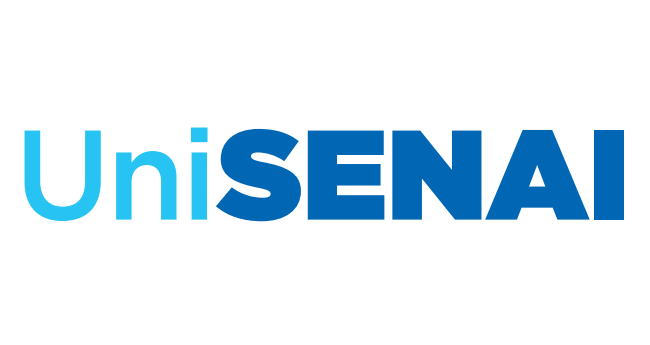
<h1> Pós-Graduação em Ciência de Dados e Inteligência Artificial </h1>

<h1>Unidade Curricular: Programação em Python para Ciência de Dados</h1>
<h1>Professor: Willian Daniel de Mattos, Me.</h1>

<h1><b>Tópico 4 - Visão Geral dos Pacotes Populares </b></h1>

4.2.2 **Panda DataFrame** - Exemplo Prático (arquivos movies_all.csv)

Arquivo disponível em:

https://drive.google.com/file/d/11-wpAuJ8qO49hvFY3rm78CDyrvn6Vd3w/view?usp=sharing



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#antes de abrir o arquivo, copiar o arquivo movies_all.csv (link acima) para a pasta Colab Notebooks do seu Google Drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_all.csv', sep=';') #lê arquivo .csv separado por ';'

In [ ]:
df.head() #exibe os 5 primeiros registros.

,code,num_critic_for_reviews,duration,num_user_for_reviews,title_year,imdb_score,aspect_ratio,movie_facebook_likes
0,4245,1.0,100.0,1.0,2015,6.7,2.39,14
1,3165,100.0,100.0,481.0,1998,6.3,1.85,0
2,4487,100.0,100.0,333.0,2001,7.1,1.85,0
3,1343,103.0,100.0,107.0,2002,5.1,1.85,478
4,539,107.0,100.0,57.0,2009,5.4,1.85,1000


In [ ]:
df.columns #exibe colunas do dataset

Index(['code', 'num_critic_for_reviews', 'duration', 'num_user_for_reviews',
       'title_year', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
len(df) #Quantidade de registros (linhas) no dataset

4884

In [ ]:
df['num_user_for_reviews'].sum() #Soma valores das colunas

1360396.0

In [ ]:
print('Contagem (Imdb):' ,df['imdb_score'].count())
print('Média (Imdb):' ,df['imdb_score'].mean())
print('Desvio Padrão (Imdb):' ,df['imdb_score'].std())
print('Máximo (Imdb):' ,df['imdb_score'].max())
print('Mínimo (Imdb):' ,df['imdb_score'].min())

Contagem (Imdb): 4884
Média (Imdb): 6.418734643734644
Desvio Padrão (Imdb): 1.109561868697088
Máximo (Imdb): 9.3
Mínimo (Imdb): 1.6


In [ ]:
df.info() #informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   code                    4884 non-null   int64  
 1   num_critic_for_reviews  4884 non-null   float64
 2   duration                4884 non-null   float64
 3   num_user_for_reviews    4884 non-null   float64
 4   title_year              4884 non-null   int64  
 5   imdb_score              4884 non-null   float64
 6   aspect_ratio            4614 non-null   float64
 7   movie_facebook_likes    4884 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 305.4 KB


In [ ]:
df['title_year'].unique() #exibe registros únicos

array([2015, 1998, 2001, 2002, 2009, 2007, 2011, 1999, 2005, 2013, 1992,
       2003, 1989, 2016, 2000, 2010, 2012, 2014, 1990, 2004, 1945, 2006,
       1981, 1997, 1936, 1996, 1995, 1993, 1929, 1987, 1986, 1980, 1991,
       1983, 1994, 2008, 1985, 1984, 1978, 1937, 1944, 1988, 1982, 1939,
       1976, 1948, 1979, 1952, 1968, 1949, 1971, 1956, 1974, 1966, 1973,
       1938, 1970, 1950, 1977, 1954, 1951, 1960, 1958, 1972, 1963, 1920,
       1969, 1964, 1962, 1965, 1975, 1967, 1953, 1946, 1947, 1941, 1940,
       1959, 1961, 1943, 1916, 1955, 1927, 1925, 1957, 1934, 1933, 1942,
       1932, 1935, 1930])

In [ ]:
df['title_year'].value_counts().sort_values() #Número de filmes por ano

1930      1
1932      1
1925      1
1934      1
1935      1
       ... 
2010    226
2013    232
2006    238
2014    245
2009    256
Name: title_year, Length: 91, dtype: int64

In [ ]:
df['imdb_score'].describe() #estatística descritiva

count    4884.000000
mean        6.418735
std         1.109562
min         1.600000
25%         5.800000
50%         6.500000
75%         7.200000
max         9.300000
Name: imdb_score, dtype: float64

In [ ]:
agrupa_por_ano = df[['title_year',
                'imdb_score',
                ]].groupby('title_year').agg(lambda x: sum(x)/len(x)).reset_index() #Calcula o imdb médio por ano
agrupa_por_ano = agrupa_por_ano.sort_index(ascending=False) #Exibe em ordem decrescente
agrupa_por_ano.head(10) #exibe 10 primeiros registros

,title_year,imdb_score
90,2016,6.369231
89,2015,6.003704
88,2014,6.197143
87,2013,6.366810
86,2012,6.268493
85,2011,6.274775
84,2010,6.285398
83,2009,6.318750
82,2008,6.324107
81,2007,6.519403


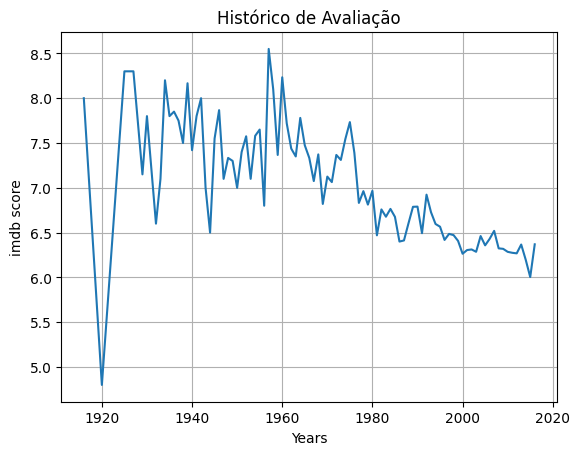

In [ ]:
#Histórico de Avaliação por ano - Exemplo de utilização da bilioteca matplotlib
fig, ax = plt.subplots()
ax.plot(agrupa_por_ano["title_year"], agrupa_por_ano["imdb_score"])
ax.set(xlabel='Years', ylabel="imdb score",
title='Histórico de Avaliação')
ax.grid()
plt.show()

In [ ]:
reviews_por_ano = df[df['title_year']>2000]
reviews_por_ano = reviews_por_ano[['title_year',
                'num_critic_for_reviews',
                ]].groupby('title_year').agg(lambda x: sum(x)).reset_index()

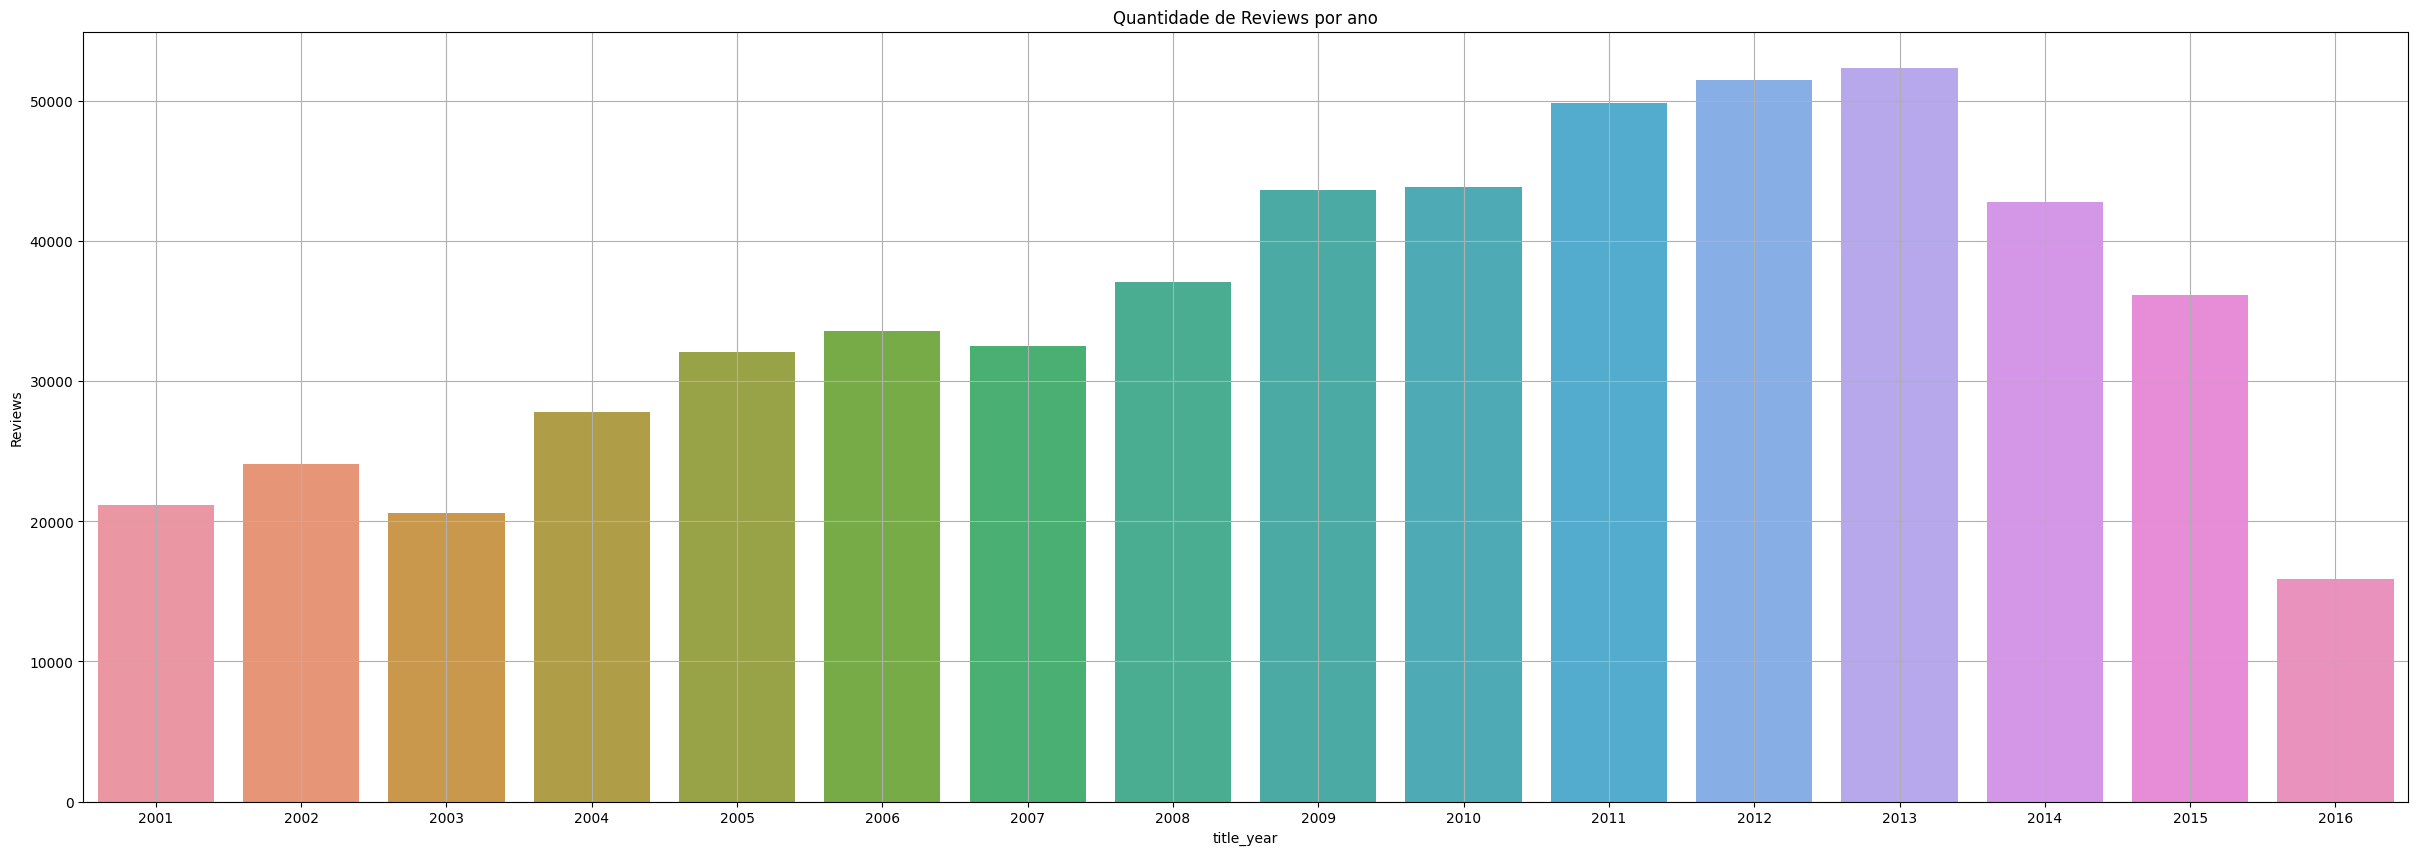

In [ ]:
#Quantidade de reviews por ano - Exemplo de utilização da bilioteca seaborn
import seaborn as sns

fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(data=reviews_por_ano, x=reviews_por_ano['title_year'], y=reviews_por_ano['num_critic_for_reviews'])
ax.set(ylabel='Reviews', title='Quantidade de Reviews por ano')
ax.grid()
plt.show()